In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66311_G')

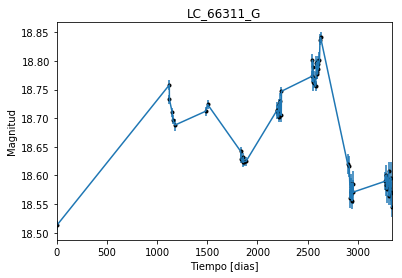

In [2]:
data = np.genfromtxt('LC_66311_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66311_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

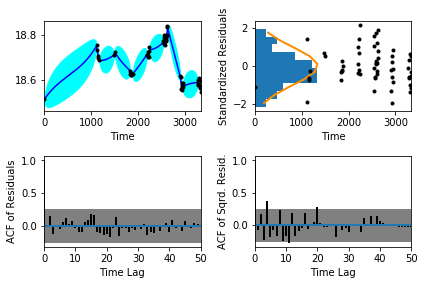

In [5]:
sample.assess_fit()

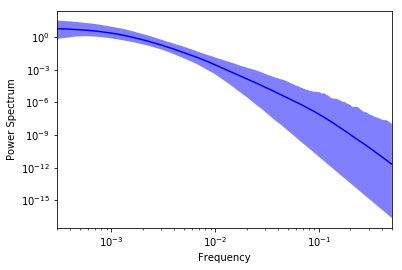

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66311_G')

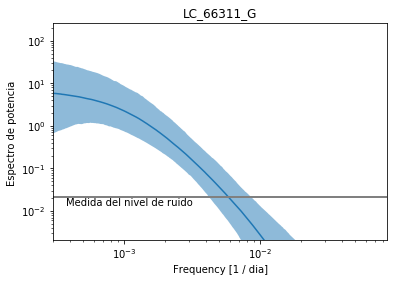

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66311_G')

Text(0.5,1,'Prediccion , valor esperado LC_66311_G')

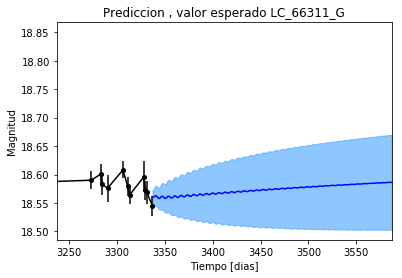

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66311_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66311_G')

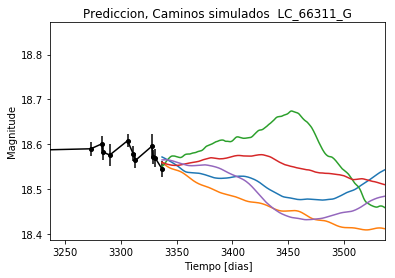

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66311_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66311_G')

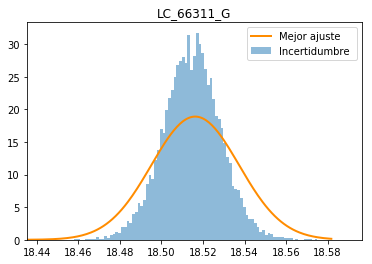

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66311_G')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_G')

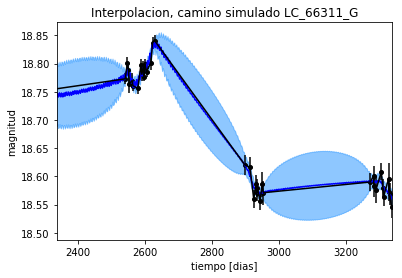

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_G')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_G')

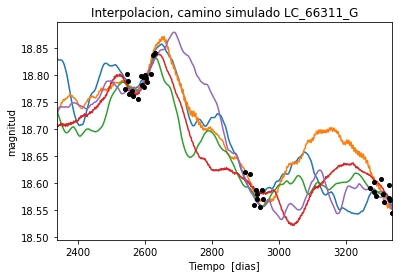

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 548.356696449
Median: 0.0134767784793
Standard deviation: 0.212095047607
68% credibility interval: [ 0.00095035  0.25093463]
95% credibility interval: [  3.40519715e-04   7.97420385e-01]
99% credibility interval: [  3.05730774e-04   9.74224430e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 828.564692721
Median: 0.0014487600168
Standard deviation: 0.072051585094
68% credibility interval: [ 0.00043039  0.0138979 ]
95% credibility interval: [ 0.00031778  0.16683004]
99% credibility interval: [  3.02469876e-04   5.40512277e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 631.222700704
Median: 0.0175049056961
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1418.35225972
Median: 162.373387762
Standard deviation: 1.70956421095
68% credibility interval: [ 160.39799246  163.62139848]
95% credibility interval: [ 157.82463645  164.25016749]
99% credibility interval: [ 155.79447251  164.68469841]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 651.381082692
Median: 0.827122213264
Standard deviation: 2.19663347028
68% credibility interval: [ 0.08586825  4.19359513]
95% credibility interval: [ 0.02088409  7.28867936]
99% credibility interval: [ 0.01238711  9.93557767]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 622.157502626
Median: 0.15103812421
Standard deviation: 7.17899884722
68% credibility interval: [ 0.00989287  3.44356299]
95% credibility interval: [  1.06674446e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16383.2674459
Median: 7.38254356312e-30
Standard deviation: 1.53273300636e+110
68% credibility interval: [  8.49828455e-58   1.74283619e+61]
95% credibility interval: [  5.10442514e-087   1.39442130e+104]
99% credibility interval: [  5.82925838e-093   2.35974384e+109]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2240.77314705
Median: 18.6661394641
Standard deviation: 0.0585684160387
68% credibility interval: [ 18.61059742  18.70634888]
95% credibility interval: [ 18.52982112  18.76520928]
99% credibility interval: [ 18.45389542  18.83417414]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 521.907385057
Median: 0.0
Standard deviation: 0.177675499201
68% credibility interval: [ 0.          0.12794662]
95% credibility interval: [ 0.          0.70858351]
99% credibility interval: [ 0.          0.91760782]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 521.907385057
Median: 0.0
Standard deviation: 0.177675499201
68% credibility interval: [ 0.          0.12794662]
95% credibility interval: [ 0.          0.70858351]
99% credibility interval: [ 0.          0.91760782]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1255.56745387
Median: 0.0
Standard deviation: 0.000332129730541
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1418.35225972
Median: 162.373387762
Standard deviation: 1.70956421095
68% credibility interval: [ 160.39799246  163.62139848]
95% credibility interval: [ 157.82463645  164.25016749]
99% credibility interval: [ 155.79447251  164.68469841]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2548.87851658
Median: 0.0134336051982
Standard deviation: 0.0179767407994
68% credibility interval: [ 0.00768415  0.02549306]
95% credibility interval: [ 0.00501284  0.05447909]
99% credibility interval: [ 0.00389808  0.10462242]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1061.63443517
Median: 1.15774602133
Standard deviation: 0.182576015825
68% credibility interval: [ 0.99726122  1.34573387]
95% credibility interval: [ 0.86591782  1.58278509]
99% credibility interval: [ 0.77569384  1.74123031]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 680.463909341
Median: 2.96226877163e-05
Standard deviation: 0.0554535423327
68% credibility interval: [  9.21526308e-66   9.36799475e-04]
95% credibility interval: [  2.37697662e-108   7.56385562e-003]
99% credibility interval: [  1.38303624e-114   3.49147696e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 548.356696449
Median: (-0.0846770965292+0j)
Standard deviation: 1.73844385831
68% credibility interval: [-1.57666879+0.j         -0.00597120-0.02025121j]
95% credibility interval: [ -5.01034005e+00+0.j          -2.13954847e-03-0.90194346j]
99% credibility interval: [ -6.12123262e+00-3.5854078j   -1.92096311e-03-0.00582638j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 828.564692721
Median: (-0.00910282765119+0.0176789603552j)
Standard deviation: 1.20466890933
68% credibility interval: [-0.08732307+2.77530879j -0.00270421+0.16752579j]
95% credibility interval: [-1.04822408+1.57395889j -0.00199669+0.00161624j]
99% credibility interval: [ -3.39613880e+00 +2.69895241e+00j  -1.90047428e-03 +2.18006048e-03j]
Posterior sum